store_and_fwd_flag : N->0, Y->1
drop id
change tine

In [2]:
import pandas as pd
from sklearn import datasets, linear_model
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
train = pd.read_csv('train.csv')
N = train.loc[train['store_and_fwd_flag']=='N']
Y = train.loc[train['store_and_fwd_flag']=='Y']
print(len(N))
print(len(Y))

train['store_and_fwd_flag'] = train['store_and_fwd_flag'].replace({'N':0, 'Y':1})
train= train.drop(['id'],axis=1)

train["pickup_datetime"] = pd.to_datetime(train["pickup_datetime"])
train["dropoff_datetime"] = pd.to_datetime(train["dropoff_datetime"])
train['pick_year'] = train["pickup_datetime"].dt.year
train['pick_month'] = train["pickup_datetime"].dt.month
train['pick_day'] = train["pickup_datetime"].dt.day

pickup_hour =  train["pickup_datetime"].dt.hour
pickup_minute = train["pickup_datetime"].dt.minute
pickup_second = train["pickup_datetime"].dt.second


pickup_time = pickup_hour*3600+pickup_minute*60+pickup_second
train['pickup_time'] = pickup_time

train= train.drop(['pickup_datetime'],axis=1)
train= train.drop(['dropoff_datetime'],axis=1)

train_x = pd.concat([train.iloc[:,0:7], train.iloc[:,8:]],axis=1)
train_y = train.iloc[:, 7]
train_y = train['trip_duration']
#train.to_csv('original_train.csv',index= False)
#train_x.to_csv('train_x.csv',index= False)
#train_y.to_csv('train_y.csv',index= False)
print(train_x)

1450599
8045
         vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
5                2                6        -73.982857        40.742195   
6                1                4        -73.969017        40.757839   
7                2                1        -73.969276        40.797779   
8                1                1        -73.999481        40.738400   
9                2                1        -73.981049        40.744339   
10               2                1        -73.982651        40.763840   
11               2                4        -73.991531        40.749439   
12               2       

####


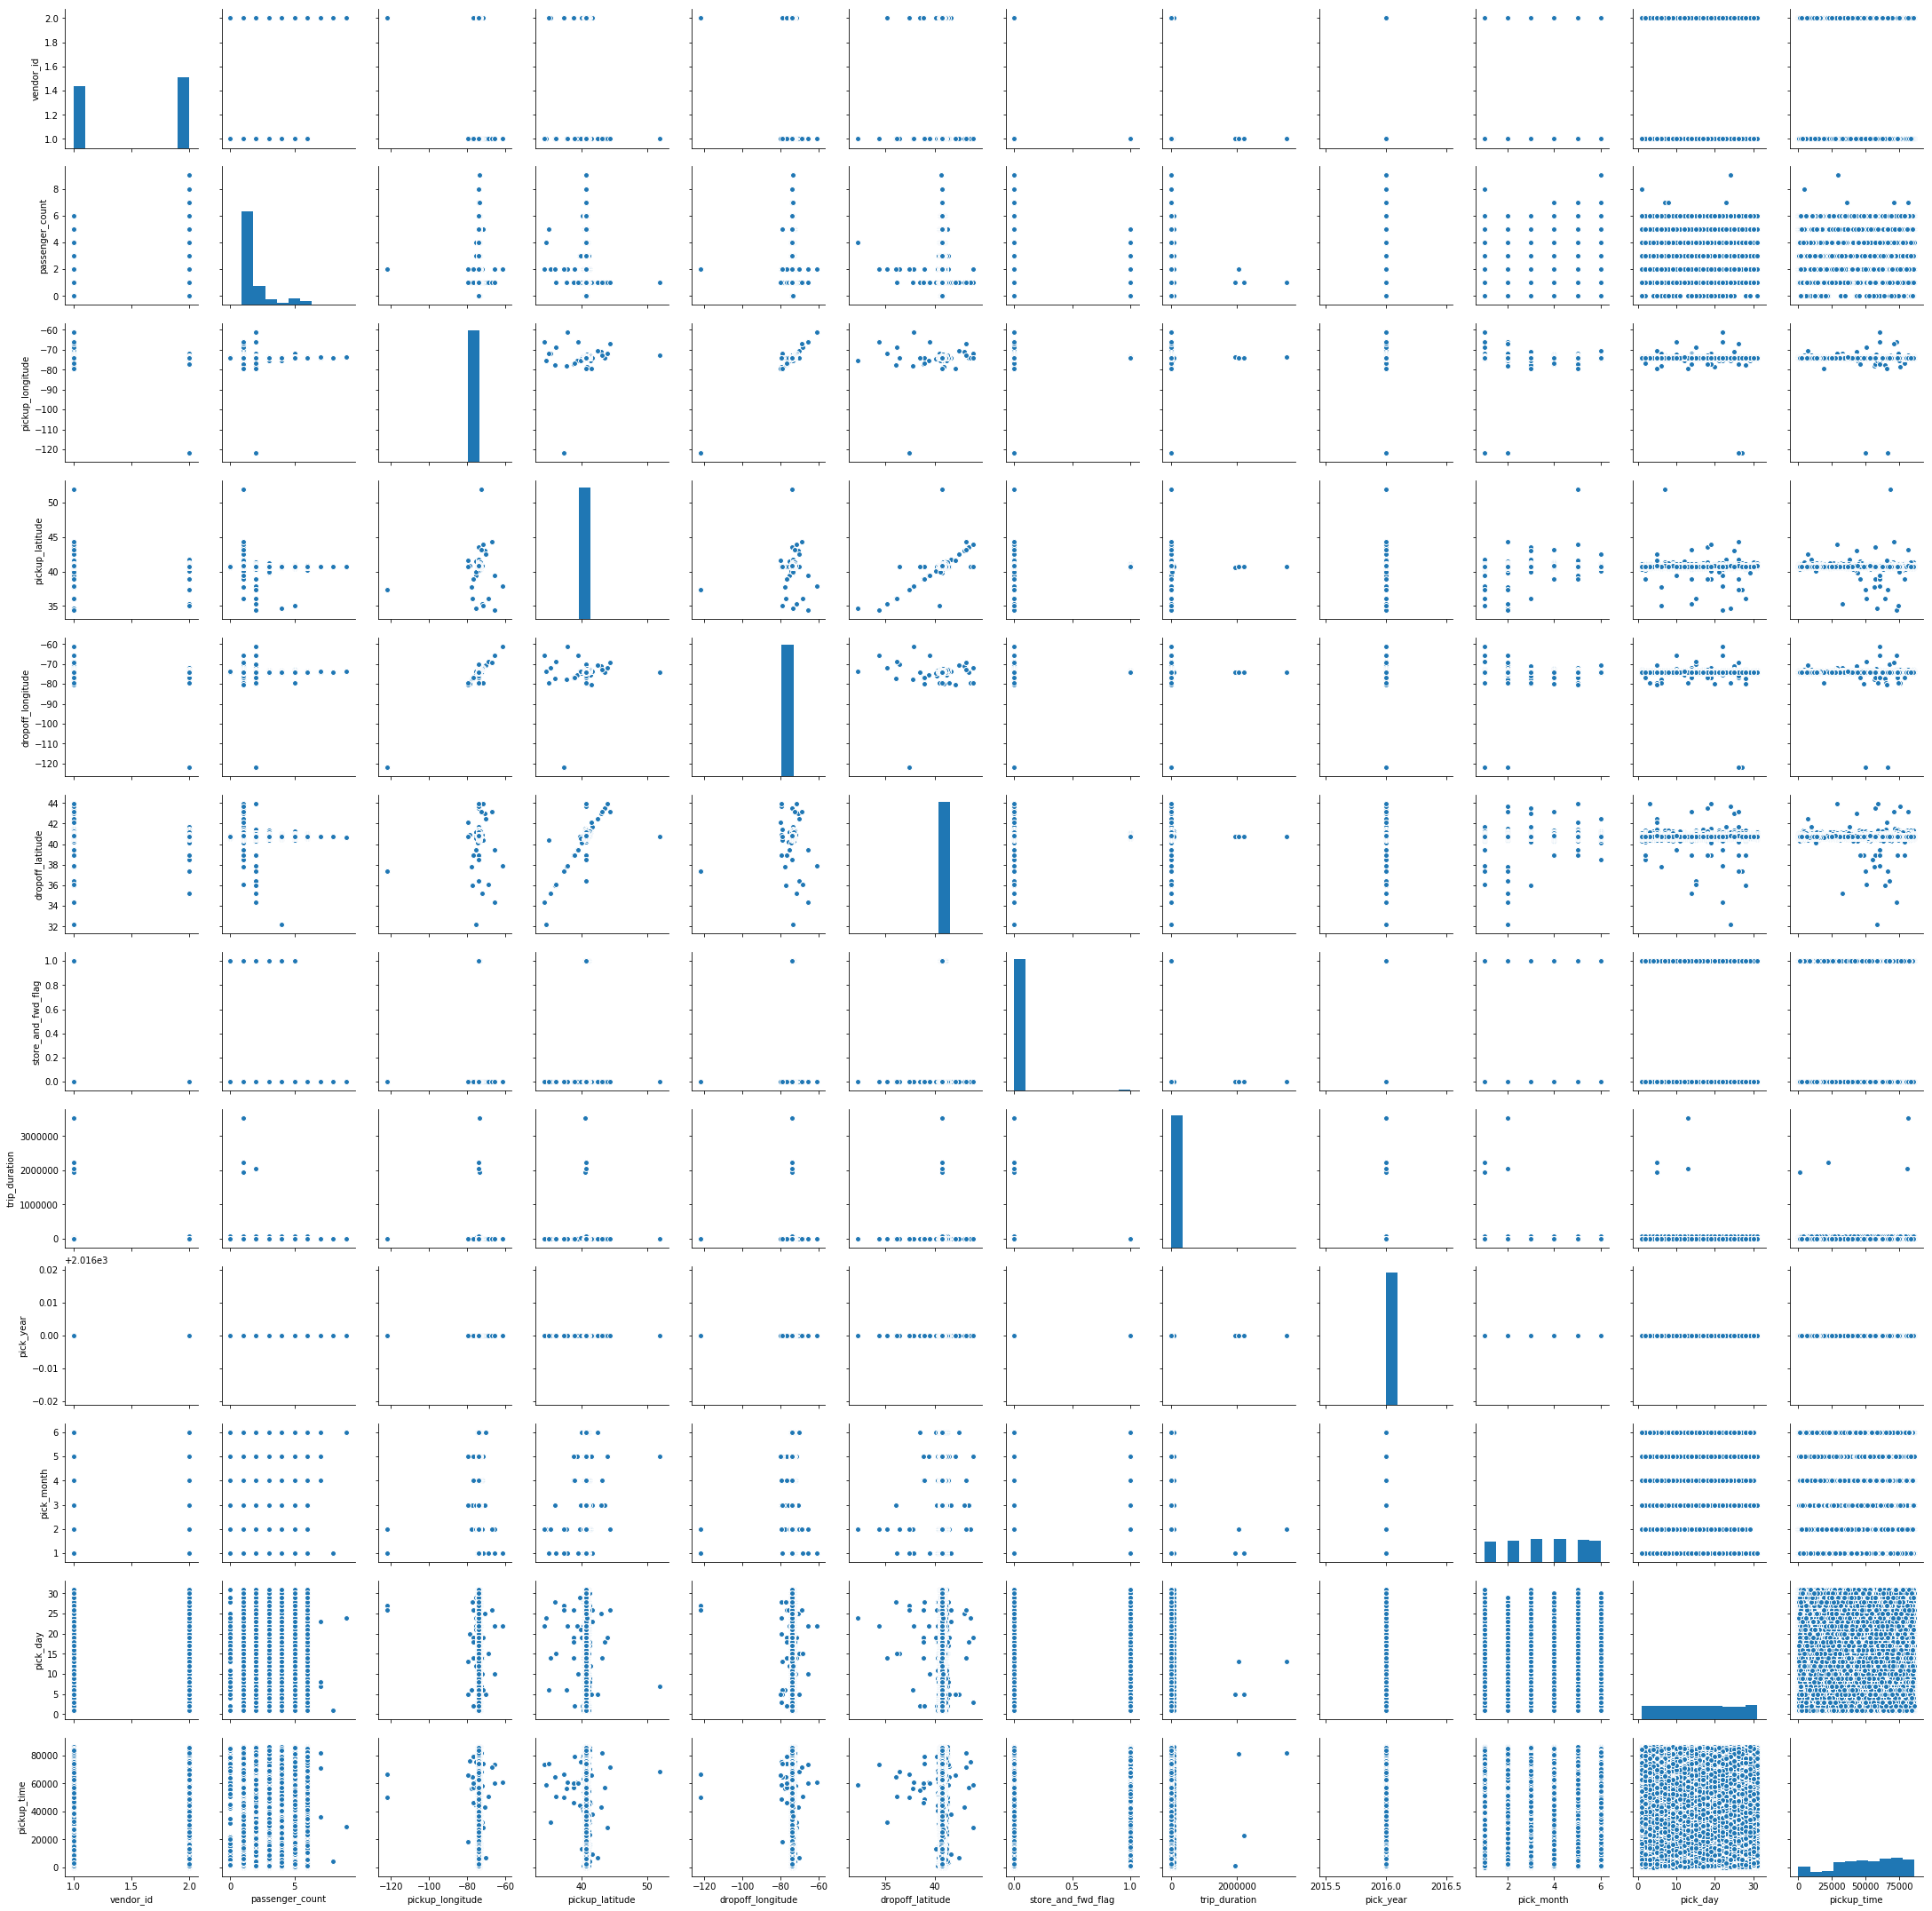

In [4]:
from matplotlib import pyplot as plt
import seaborn as sns

sns.pairplot(train)
print("####")
plt.figure()

In [86]:
test = pd.read_csv('test.csv')
N = test.loc[test['store_and_fwd_flag']=='N']
Y = test.loc[test['store_and_fwd_flag']=='Y']
print(len(N))
print(len(Y))
test= test.drop(['id'],axis=1)
test['store_and_fwd_flag'] = test['store_and_fwd_flag'].replace({'N':0, 'Y':1})

test["pickup_datetime"] = pd.to_datetime(test["pickup_datetime"])

test['pick_year'] = test["pickup_datetime"].dt.year
test['pick_month'] = test["pickup_datetime"].dt.month
test['pick_day'] = test["pickup_datetime"].dt.day

pickup_hour =  test["pickup_datetime"].dt.hour
pickup_minute = test["pickup_datetime"].dt.minute
pickup_second = test["pickup_datetime"].dt.second


pickup_time = pickup_hour*3600+pickup_minute*60+pickup_second
test['pickup_time'] = pickup_time



test= test.drop(['pickup_datetime'],axis=1)
#test.to_csv('original_test.csv',index= False)
print(test)

621704
3430
        vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0               1                1        -73.988129        40.732029   
1               1                1        -73.964203        40.679993   
2               1                1        -73.997437        40.737583   
3               2                1        -73.956070        40.771900   
4               1                1        -73.970215        40.761475   
5               1                1        -73.991302        40.749798   
6               1                1        -73.978310        40.741550   
7               1                2        -74.012711        40.701527   
8               2                2        -73.992332        40.730511   
9               2                1        -73.993179        40.748760   
10              1                4        -73.968529        40.678432   
11              2                1        -73.982773        40.756908   
12              1                1     

add L2

In [79]:
x = train_x.copy()
y = train_y.copy()
test = test.copy()

df_lat1 = np.array(x['pickup_latitude'])
df_lon1 = np.array(x['pickup_longitude'])
df_lat2 = np.array(x['dropoff_latitude'])
df_lon2 = np.array(x['dropoff_longitude'])

dft_lat1 = np.array(test['pickup_latitude'])
dft_lon1 = np.array(test['pickup_longitude'])
dft_lat2 = np.array(test['dropoff_latitude'])
dft_lon2 = np.array(test['dropoff_longitude'])

L2 = []
for idx in range(len(df_lat1)):
    lat1 = df_lat1[idx]
    lon1 = df_lon1[idx]
    lat2 = df_lat2[idx]
    lon2 = df_lon2[idx]
    L2.append(get_L2(lat1,lon1,lat2,lon2))
L2_t = []
for idx in range(len(dft_lat1)):
    lat1 = dft_lat1[idx]
    lon1 = dft_lon1[idx]
    lat2 = dft_lat2[idx]
    lon2 = dft_lon2[idx]
    L2_t.append(get_L2(lat1,lon1,lat2,lon2))
x['L2'] = L2
test['L2'] = L2_t

test.to_csv('L2_test.csv',index= False)
x.to_csv('L2_train_x.csv',index= False)


In [80]:
print(test.iloc[0:1, :])
print(x.iloc[0:1, :])

   vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          1                1        -73.988129        40.732029   

   dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pick_year  \
0         -73.990173          40.75668                   0       2016   

   pick_month  pick_day  pickup_time        L2  
0           6        30        86398  2.747288  
   vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0          2                1        -73.982155        40.767937   

   dropoff_longitude  dropoff_latitude  store_and_fwd_flag  pick_year  \
0          -73.96463         40.765602                   0       2016   

   pick_month  pick_day  pickup_time        L2  
0           3        14        62695  1.498991  


use PCA on L2

In [81]:
from sklearn.decomposition import PCA

pca = PCA( n_components = 5, svd_solver = 'full')
pca.fit(x)
pca_x = pca.transform(x)
pca.fit(test)
pca_test = pca.transform(test)

pca_test = pd.DataFrame(pca_test)
pca_x = pd.DataFrame(pca_x)
print(pca_test.iloc[0:1, :])
print(pca_x.iloc[0:1, :])
pca_test.to_csv('L2_pca_test.csv',index= False)
pca_x.to_csv('L2__pca_train_x.csv',index= False)


              0          1         2         3         4
0 -35595.758961  14.478158 -0.606359 -2.534095 -0.725378
              0         1         2         3         4
0 -11906.775164 -1.511912 -1.906837  0.502358 -0.603213


In [94]:
regr = LinearSVR(C = 0.1)
regr.fit(pca_x, train_y)
pred_y =  regr.predict(pca_test)

duration_content = np.rint(pred_y)
id_content = np.array(test_id)

df = pd.DataFrame({
    'id':id_content,
    'trip_duration':duration_content
})

# Create the csv file
df.to_csv('PCA_linearSVR.csv',index= False)

use poly on L2

In [82]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(x)
poly_x = poly.transform(x)
poly.fit(test)
poly_test = poly.transform(test)

poly_test = pd.DataFrame(poly_test)
poly_x = pd.DataFrame(poly_x)
print(poly_test.iloc[0:1, :])
print(poly_x.iloc[0:1, :])
#poly_test.to_csv('L2_poly_test.csv',index= False)
#pca_x.to_csv('L2__poly_train_x.csv',index= False)



    0    1    2          3          4          5         6    7       8    9   \
0  1.0  1.0  1.0 -73.988129  40.732029 -73.990173  40.75668  0.0  2016.0  6.0   

     ...       81     82        83         84     85         86        87  \
0    ...     36.0  180.0  518388.0  16.483728  900.0  2591940.0  82.41864   

             88             89        90  
0  7.464614e+09  237360.187371  7.547591  

[1 rows x 91 columns]
    0    1    2          3          4         5          6    7       8    9   \
0  1.0  2.0  1.0 -73.982155  40.767937 -73.96463  40.765602  0.0  2016.0  3.0   

     ...      81    82        83        84     85        86         87  \
0    ...     9.0  42.0  188085.0  4.496974  196.0  877730.0  20.985877   

             88           89        90  
0  3.930663e+09  93979.25322  2.246975  

[1 rows x 91 columns]


use RFE

In [66]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

estimator = LinearSVR(random_state=0)

selector = RFE(estimator, 5, step=1)
selector.fit(train_x, train_y)


RFE_x = selector.transform(train_x)
RFE_test = selector.transform(test)

In [68]:
RFE_test = pd.DataFrame(RFE_test)
RFE_x = pd.DataFrame(RFE_x)
RFE_test.to_csv('L2_RFE_test.csv',index= False)
RFE_x.to_csv('L2__RFE_train_x.csv',index= False)

In [93]:
regr = LinearSVR(C = 0.1)
regr.fit(RFE_x, train_y)
pred_y =  regr.predict(RFE_test)

duration_content = np.rint(pred_y)
id_content = np.array(test_id)

df = pd.DataFrame({
    'id':id_content,
    'trip_duration':duration_content
})

# Create the csv file
df.to_csv('RFE_linearSVR.csv',index= False)

use LDA

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()
clf.fit(train_x, train_y)
lda_x = clf.transform(train_x)
lda_test = clf.transform(test)

/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [90]:
lda_test = pd.DataFrame(lda_test)
lda_x = pd.DataFrame(lda_x)
lda_test.to_csv('L2_LDA_test.csv',index= False)
lda_x.to_csv('L2__LDA_train_x.csv',index= False)

In [92]:
regr = LinearSVR(C = 0.1)
regr.fit(lda_x, train_y)
pred_y =  regr.predict(lda_test)

duration_content = np.rint(pred_y)
id_content = np.array(test_id)

df = pd.DataFrame({
    'id':id_content,
    'trip_duration':duration_content
})

# Create the csv file
df.to_csv('LDA_linearSVR.csv',index= False)

In [ ]:
lda_test.to_csv('L2_lda_test.csv',index= False)
lda_x.to_csv('L2__lda_train_x.csv',index= False)

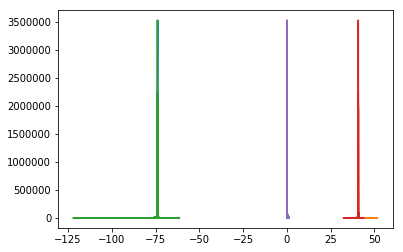

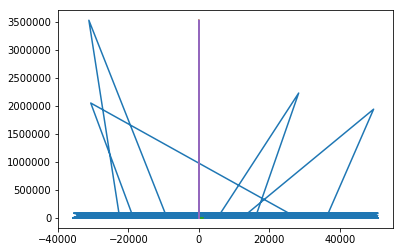

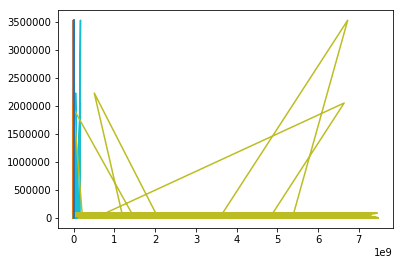

                 0          1          2          3    4
0       -73.982155  40.767937 -73.964630  40.765602  0.0
1       -73.980415  40.738564 -73.999481  40.731152  0.0
2       -73.979027  40.763939 -74.005333  40.710087  0.0
3       -74.010040  40.719971 -74.012268  40.706718  0.0
4       -73.973053  40.793209 -73.972923  40.782520  0.0
5       -73.982857  40.742195 -73.992081  40.749184  0.0
6       -73.969017  40.757839 -73.957405  40.765896  0.0
7       -73.969276  40.797779 -73.922470  40.760559  0.0
8       -73.999481  40.738400 -73.985786  40.732815  0.0
9       -73.981049  40.744339 -73.973000  40.789989  0.0
10      -73.982651  40.763840 -74.002228  40.732990  0.0
11      -73.991531  40.749439 -73.956543  40.770630  0.0
12      -73.962982  40.756680 -73.984406  40.760719  0.0
13      -73.956306  40.767941 -73.966110  40.763000  0.0
14      -73.992195  40.727226 -73.974655  40.783070  0.0
15      -73.955513  40.768593 -73.948761  40.771545  0.0
16      -73.991165  40.755562 -

In [84]:
import matplotlib.pyplot as plt
plt.plot(RFE_x, train_y)
plt.show()
plt.plot(pca_x, train_y)
plt.show()
plt.plot(poly_x, train_y)
plt.show()
print(RFE_x)

add L1

In [75]:
x = train_x.copy()
y = train_y.copy()
test = test.copy()

df_lat1 = np.array(x['pickup_latitude'])
df_lon1 = np.array(x['pickup_longitude'])
df_lat2 = np.array(x['dropoff_latitude'])
df_lon2 = np.array(x['dropoff_longitude'])

dft_lat1 = np.array(test['pickup_latitude'])
dft_lon1 = np.array(test['pickup_longitude'])
dft_lat2 = np.array(test['dropoff_latitude'])
dft_lon2 = np.array(test['dropoff_longitude'])

L1 = []
for idx in range(len(df_lat1)):
    lat1 = df_lat1[idx]
    lon1 = df_lon1[idx]
    lat2 = df_lat2[idx]
    lon2 = df_lon2[idx]
    L1.append(abs(lat1-lat2)+abs(lon1-lon2))
L1_t = []
for idx in range(len(dft_lat1)):
    lat1 = dft_lat1[idx]
    lon1 = dft_lon1[idx]
    lat2 = dft_lat2[idx]
    lon2 = dft_lon2[idx]
    L1_t.append(abs(lat1-lat2)+abs(lon1-lon2))
x['L1'] = L1
test['L1'] = L1_t


test.to_csv('L1_test.csv',index= False)
x.to_csv('L1_train_x.csv',index= False)

use PCA on L1

In [76]:
from sklearn.decomposition import PCA

pca = PCA( n_components = 5, svd_solver = 'full')
pca.fit(x)
pca_x = pca.transform(x)
pca.fit(test)
test = pca.transform(test)

test = pd.DataFrame(test)
pca_x = pd.DataFrame(pca_x)
print(test.iloc[0:1, :])
print(pca_x.iloc[0:1, :])
test.to_csv('L1_pca_test.csv',index= False)
pca_x.to_csv('L1__pca_train_x.csv',index= False)


              0          1         2         3        4
0 -35595.758959  14.480381 -2.529849 -0.729164  0.45036
              0         1         2         3         4
0 -11906.775158 -1.504472  0.516384 -0.609995 -0.541639


use poly on L1

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)
poly.fit(x)
poly_x = poly.transform(x)
poly.fit(test)
poly_test = poly.transform(test)

poly_test = pd.DataFrame(poly_test)
poly_x = pd.DataFrame(poly_x)
print(poly_test.iloc[0:1, :])
print(poly_x.iloc[0:1, :])
poly_test.to_csv('L1_poly_test.csv',index= False)
pca_x.to_csv('L1__poly_train_x.csv',index= False)



In [46]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=40, random_state=0)

position_x = pd.concat([x.iloc[:,11:12],x.iloc[:,2:6]],axis =  1)
print(position_x)
kmeans.fit(position_x)
print(kmeans.labels_)



                L2  pickup_longitude  pickup_latitude  dropoff_longitude  \
0         1.498991        -73.982155        40.767937         -73.964630   
1         1.806074        -73.980415        40.738564         -73.999481   
2         6.387103        -73.979027        40.763939         -74.005333   
3         1.485965        -74.010040        40.719971         -74.012268   
4         1.188962        -73.973053        40.793209         -73.972923   
5         1.099287        -73.982857        40.742195         -73.992081   
6         1.326695        -73.969017        40.757839         -73.957405   
7         5.716775        -73.969276        40.797779         -73.922470   
8         1.310765        -73.999481        40.738400         -73.985786   
9         5.122769        -73.981049        40.744339         -73.973000   
10        3.807334        -73.982651        40.763840         -74.002228   
11        3.774280        -73.991531        40.749439         -73.956543   
12        1.

In [47]:
x['position']=kmeans.labels_
print(x)

#x.to_csv('train_x_position.csv',index= False)


         vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
5                2                6        -73.982857        40.742195   
6                1                4        -73.969017        40.757839   
7                2                1        -73.969276        40.797779   
8                1                1        -73.999481        40.738400   
9                2                1        -73.981049        40.744339   
10               2                1        -73.982651        40.763840   
11               2                4        -73.991531        40.749439   
12               2                2   

In [48]:
y = kmeans.fit_predict(test)
print(y)

[13 13 13 ... 18 18 18]


In [49]:
test_position = test
test_position['position'] = y
test_position.to_csv('test_position.csv',index= False)

In [51]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=40, random_state=0)
print(train_x.iloc[:,7:11])
time_x = train_x.iloc[:,7:11]
kmeans.fit(time_x)
print(kmeans.labels_)

         pick_year  pick_month  pick_day  pickup_time
0             2016           3        14        62695
1             2016           6        12         2615
2             2016           1        19        41724
3             2016           4         6        70351
4             2016           3        26        48655
5             2016           1        30        79300
6             2016           6        17        81299
7             2016           5        21        28498
8             2016           5        27        83543
9             2016           3        10        78301
10            2016           5        10        79721
11            2016           5        15        40571
12            2016           2        19        35566
13            2016           6         1        75509
14            2016           5        27         2616
15            2016           5        16        55742
16            2016           4        11        62990
17            2016          

In [52]:
x['time'] =  kmeans.labels_
print(x)

train_x.to_csv('train_position_time_x.csv',index= False)

         vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
5                2                6        -73.982857        40.742195   
6                1                4        -73.969017        40.757839   
7                2                1        -73.969276        40.797779   
8                1                1        -73.999481        40.738400   
9                2                1        -73.981049        40.744339   
10               2                1        -73.982651        40.763840   
11               2                4        -73.991531        40.749439   
12               2                2   

In [30]:
train_x = train_x.drop(['position'],axis=1)

In [31]:
print(train_x)


         vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
5                2                6        -73.982857        40.742195   
6                1                4        -73.969017        40.757839   
7                2                1        -73.969276        40.797779   
8                1                1        -73.999481        40.738400   
9                2                1        -73.981049        40.744339   
10               2                1        -73.982651        40.763840   
11               2                4        -73.991531        40.749439   
12               2                2   

In [53]:
time_y = kmeans.fit_predict(test)
print(time_y)

[27 27 27 ...  2  2  2]


In [55]:
test['time'] = time_y
print(test)
test.to_csv('test_position_time_x.csv',index= False)

        vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0               1                1        -73.988129        40.732029   
1               1                1        -73.964203        40.679993   
2               1                1        -73.997437        40.737583   
3               2                1        -73.956070        40.771900   
4               1                1        -73.970215        40.761475   
5               1                1        -73.991302        40.749798   
6               1                1        -73.978310        40.741550   
7               1                2        -74.012711        40.701527   
8               2                2        -73.992332        40.730511   
9               2                1        -73.993179        40.748760   
10              1                4        -73.968529        40.678432   
11              2                1        -73.982773        40.756908   
12              1                1        -73.92110

In [57]:
print(x)
x.to_csv('train_position_time_x.csv',index= False)

         vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
0                2                1        -73.982155        40.767937   
1                1                1        -73.980415        40.738564   
2                2                1        -73.979027        40.763939   
3                2                1        -74.010040        40.719971   
4                2                1        -73.973053        40.793209   
5                2                6        -73.982857        40.742195   
6                1                4        -73.969017        40.757839   
7                2                1        -73.969276        40.797779   
8                1                1        -73.999481        40.738400   
9                2                1        -73.981049        40.744339   
10               2                1        -73.982651        40.763840   
11               2                4        -73.991531        40.749439   
12               2                2   